# RNN To predict bitcoin prices

In [1]:
# First step, import libraries and then dataset
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

In [2]:
# Import the dataset and encode the date
df = pd.read_csv("coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv")
df['date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('date')
Real_Price = group['Weighted_Price'].mean()

Bitcoin predictions are going to be for a month, so we need to split the dataset accordingly

In [3]:
# split data
prediction_days = 30
df_train= Real_Price[:len(Real_Price)-prediction_days]
df_test= Real_Price[len(Real_Price)-prediction_days:]

Some pre-processing is also necessary:

In [4]:
# Data preprocess
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [5]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

Using TensorFlow backend.
/usr/local/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Epoch 1/100
1434/1434 [==============================] - 1s 800us/step - loss: 0.0653
Epoch 2/100
1434/1434 [==============================] - 1s 446us/step - loss: 0.0347
Epoch 3/100
1434/1434 [==============================] - 1s 443us/step - loss: 0.0313
Epoch 4/100
1434/1434 [==============================] - 1s 470us/step - loss: 0.0277
Epoch 5/100
1434/1434 [==============================] - 1s 483us/step - loss: 0.0237
Epoch 6/100
1434/1434 [==============================] - 1s 571us/step - loss: 0.0193
Epoch 7/100
1434/1434 [==============================] - 1s 465us/step - loss: 0.0148
Epoch 8/100
1434/1434 [==============================] - 1s 473us/step - loss: 0.0105
Epoch 9/100
1434/1434 [==============================] - 1s 490us/step - loss: 0.0067
Epoch 10/100
1434/1434 [==============================] - 1s 441us/step - loss: 0.0038
Epoch 11/100
1434/1434 [==============================] - 1s 460us/step - loss: 0.0019
Epoch 12/100
1434/1434 [============================

1434/1434 [==============================] - 1s 449us/step - loss: 1.5205e-04
Epoch 92/100
1434/1434 [==============================] - 1s 516us/step - loss: 1.5079e-04
Epoch 93/100
1434/1434 [==============================] - 1s 487us/step - loss: 1.4516e-04
Epoch 94/100
1434/1434 [==============================] - 1s 552us/step - loss: 1.5123e-04
Epoch 95/100
1434/1434 [==============================] - 1s 471us/step - loss: 1.5093e-04
Epoch 96/100
1434/1434 [==============================] - 1s 486us/step - loss: 1.5136e-04
Epoch 97/100
1434/1434 [==============================] - 1s 446us/step - loss: 1.4829e-04
Epoch 98/100
1434/1434 [==============================] - 1s 477us/step - loss: 1.4589e-04
Epoch 99/100
1434/1434 [==============================] - 1s 485us/step - loss: 1.4981e-04
Epoch 100/100
1434/1434 [==============================] - 1s 445us/step - loss: 1.4987e-04


In [6]:
# Making the predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

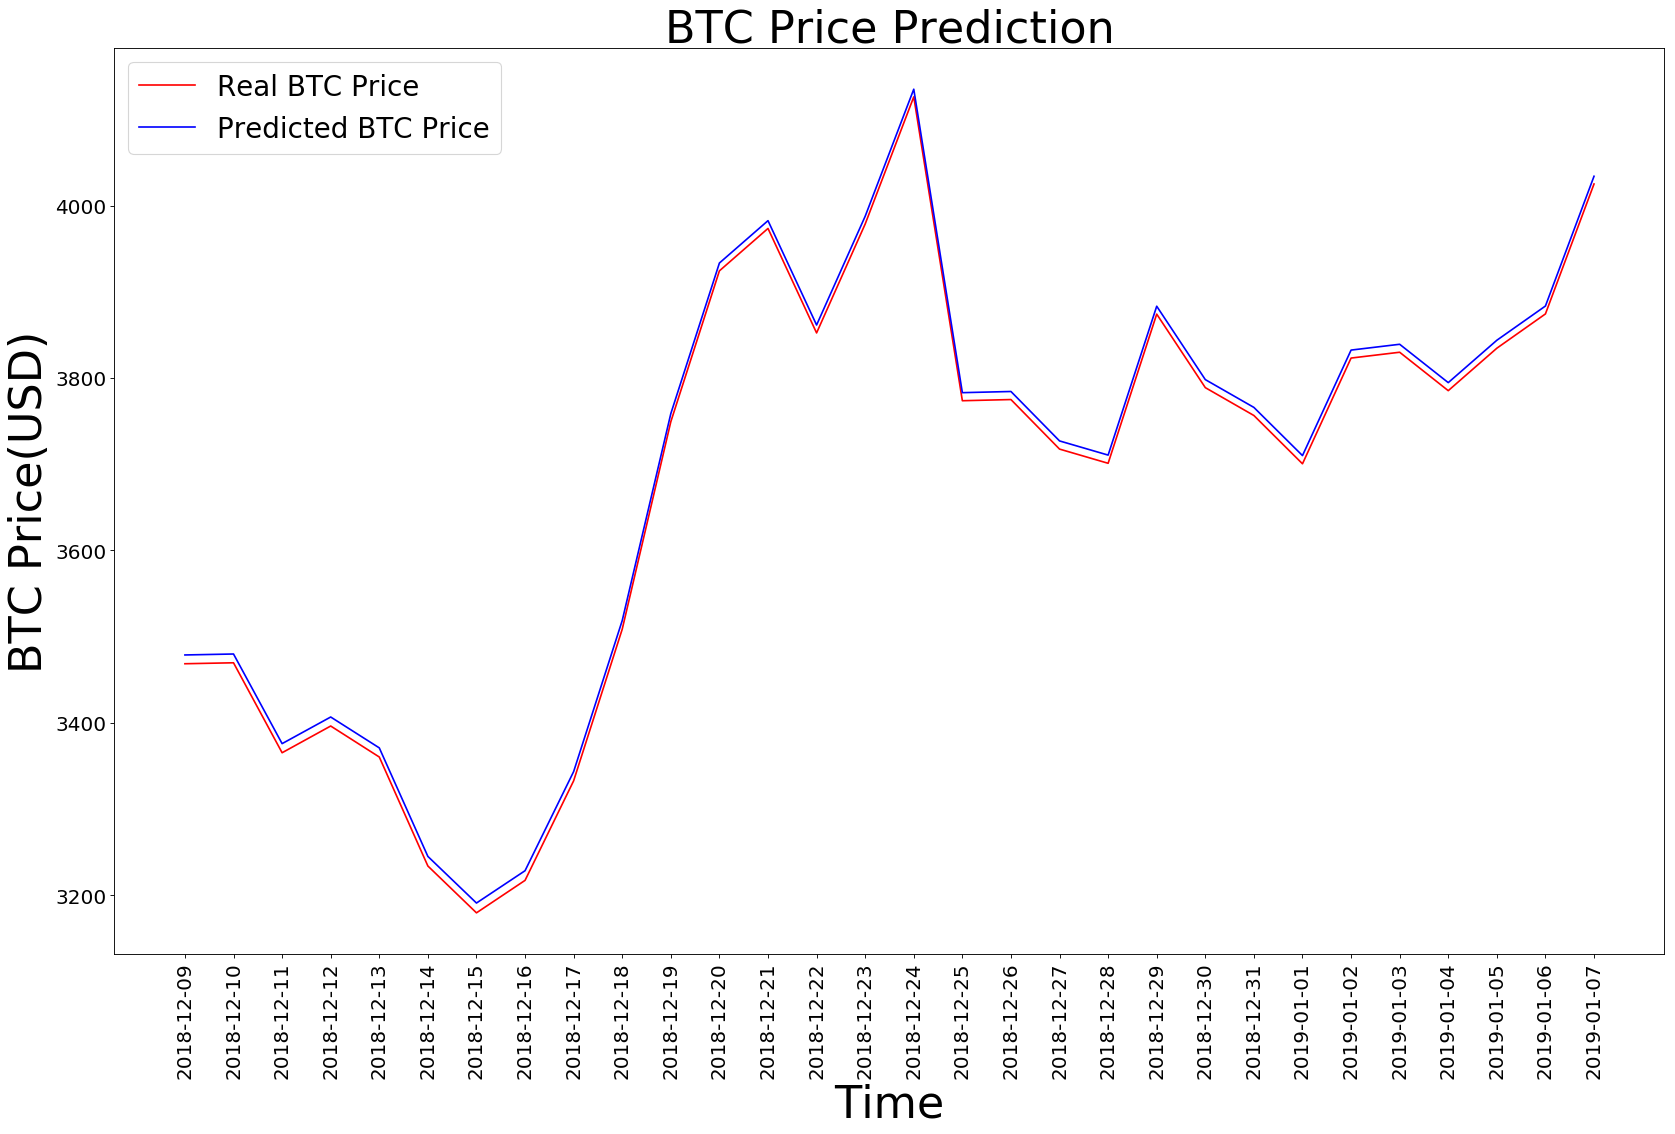

In [7]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()